<a href="https://colab.research.google.com/github/Pooja-ghode09/basic-sentiment-analysis-classifier/blob/main/assesment3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
folder_path = '/content/drive/MyDrive/file'

In [ ]:
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

In [ ]:
model = VGG16(weights='imagenet')


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
def prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

In [ ]:
def predict_image(img_path):
    img = prepare_image(img_path)
    preds = model.predict(img)
    decoded = decode_predictions(preds, top=1)[0][0]
    return decoded[1], decoded[2]

In [ ]:
for img_path in image_files:
    label, confidence = predict_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


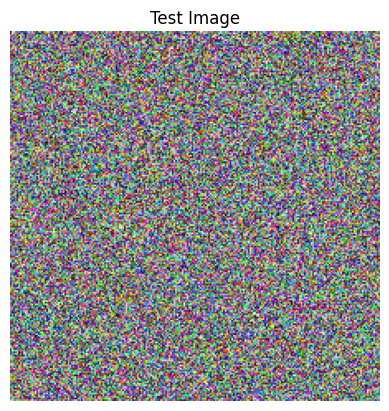

In [ ]:
img = np.random.rand(224, 224, 3)  # random image
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step


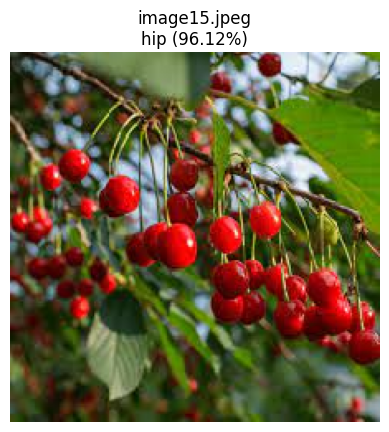

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


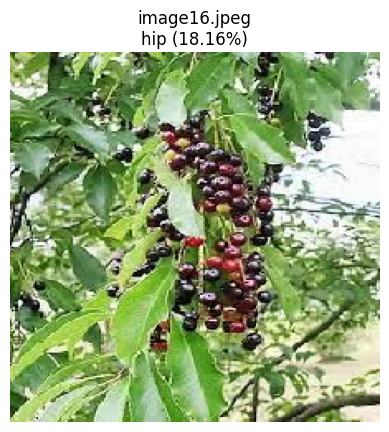

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


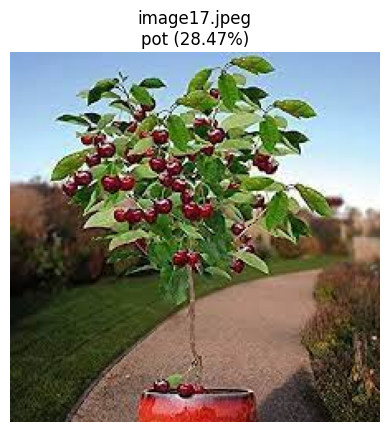

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


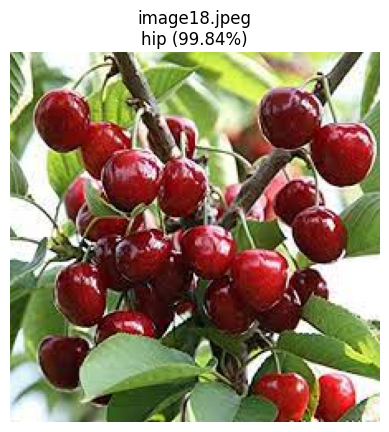

In [ ]:
for img_path in image_files:
    try:
        label, confidence = predict_image(img_path)

        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{os.path.basename(img_path)}\n{label} ({confidence*100:.2f}%)")
        plt.show()
    except Exception as e:
        print(f"Error with {img_path}: {e}")
